# Fast fourier transform of a mask at the far field and at the focal plane

We show how several procedures to obtain the intensity distribution at the far field. 

- The first method is to use the Fast Fourier Transform (FFT) to calculate the intensity distribution at the far field. 
- The second method is to use the Chirped-Z transform (CZT) to calculate the intensity distribution at the far field, using a huge observation window.
- The third method is to calculate the intensity distribution at the focal plane of a lens.

We take advantage of the fact that the intensity distribution at the focal plane of a lens is equivalent to that obtained in the far field. 

For the far field, we need to use the amplification parameter with Rayleigh-Sommefeld (RS) to increase the size of the observation window. If the 'amplification' parameter is (N,M), the storage and computing time increases approximatedly in NxM. Therefore this method is not efficient for large observation windows.

With CZT we just need to propagate and increase the observation window size with the 'xout' and 'yout' parameters. The storage and computing time does not increase with the size of the observation window.

In [1]:
from diffractio import np
from diffractio import um, mm

from diffractio.scalar_masks_XY import Scalar_mask_XY
from diffractio.scalar_sources_XY import Scalar_source_XY

In [2]:
x0=np.linspace(-.125*mm,.125*mm,512)
y0=np.linspace(-.125*mm,.125*mm,512)
wavelength=0.6328*um

In [3]:
u0=Scalar_source_XY(x=x0,y=y0, wavelength=wavelength)
u0.plane_wave()

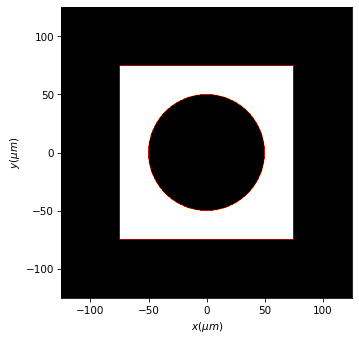

In [4]:
ta=Scalar_mask_XY(x=x0,y=y0, wavelength=wavelength)
ta.square(r0=(0*um, 0*um), size=150*um, angle=0)

tb=Scalar_mask_XY(x=x0,y=y0, wavelength=wavelength)
tb.circle(r0=(0*um, 0*um), radius = 50*um, angle=0)

t0 = ta-tb
t0.draw()

In [5]:
# Thin element approximation: Field just after the mask
u1=u0*t0

## Observation at the far field using FFT


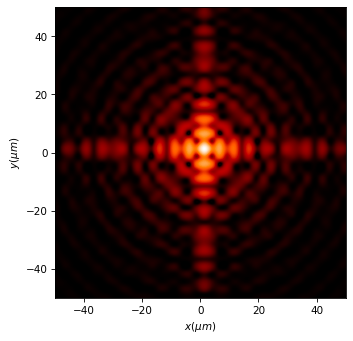

In [6]:
u2_fft = u1.fft(z=1*mm, remove0=False, new_field=True)                                                         
u2_fft.normalize()
u2_fft.cut_resample(x_limits = (-50*um, 50*um), y_limits = (-50*um, 50*um),
                    num_points = (1024,1024))
u2_fft.draw(logarithm=1e4)

## Observation at the far field using CZT


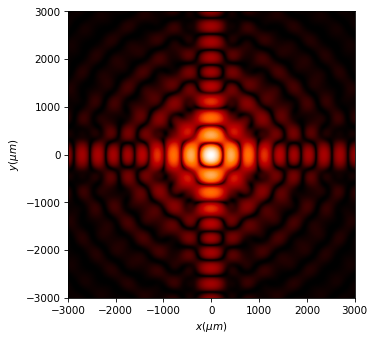

In [7]:
u2_czt = u1.CZT(z=75*mm, xout=np.linspace(-3*mm,3*mm,512), yout=np.linspace(-3*mm,3*mm,512))
u2_czt.normalize()
u2_czt.draw(logarithm=1e4)

The resolution at the far field is better with this procedure.

## Observation at the focal plane of a lens

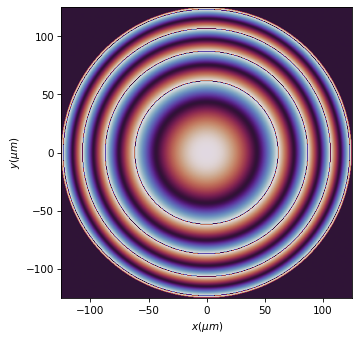

In [8]:
focal=3*mm
t_lens=Scalar_mask_XY(x=x0,y=y0, wavelength=wavelength)
t_lens.lens(r0=(0*um, 0*um), focal=focal)
t_lens.pupil()
t_lens.draw('phase', percentage_intensity=0.01)

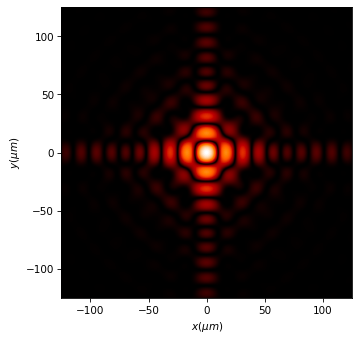

In [9]:
u1=u0*t0*t_lens
u2=u1.RS(z=focal)
u2.draw(logarithm=1e1)